# Product Demand Prediction with Machine Learning

### A product company plans to offer discounts on its product during the upcoming holiday season. The company wants to find the price at which its product can be a better deal compared to its competitors.

#### Importing the Python libraries

In [116]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

#### Data Preprocessing

In [117]:
data = pd.read_csv("D:\ProductDemand.csv")
data.head(10)

ID  Store ID  Total Price  Base Price  Units Sold
0   1      8091      99.0375    111.8625          20
1   2      8091      99.0375     99.0375          28
2   3      8091     133.9500    133.9500          19
3   4      8091     133.9500    133.9500          44
4   5      8091     141.0750    141.0750          52
5   9      8091     227.2875    227.2875          18
6  10      8091     327.0375    327.0375          47
7  13      8091     210.9000    210.9000          50
8  14      8091     190.2375    234.4125          82
9  17      8095      99.0375     99.0375          99

In [118]:
data.tail(10)

ID  Store ID  Total Price  Base Price  Units Sold
150140  212633      9984     327.0375    327.0375          15
150141  212634      9984     163.8750    210.9000         204
150142  212635      9984     205.9125    205.9125          20
150143  212636      9984     205.9125    205.9125          12
150144  212637      9984     239.4000    239.4000          23
150145  212638      9984     235.8375    235.8375          38
150146  212639      9984     235.8375    235.8375          30
150147  212642      9984     357.6750    483.7875          31
150148  212643      9984     141.7875    191.6625          12
150149  212644      9984     234.4125    234.4125          15

#### Describing the columns

In [119]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB
None


#### Checking for null values in the dataset

In [120]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

#### Dropping null values from the dataset

In [121]:
data = data.dropna()

#### Exploratory Data Analysis

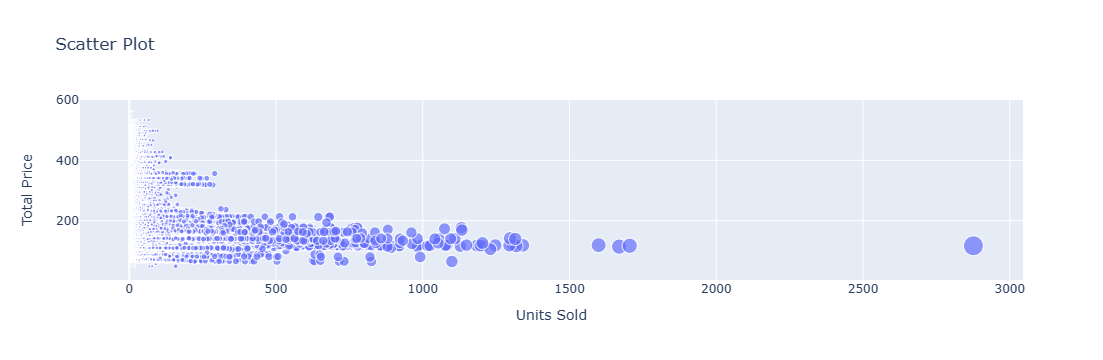

In [165]:
fig =px.scatter(data, x="Units Sold", y="Total Price",
                 size='Units Sold',title='Scatter Plot')
fig.show()

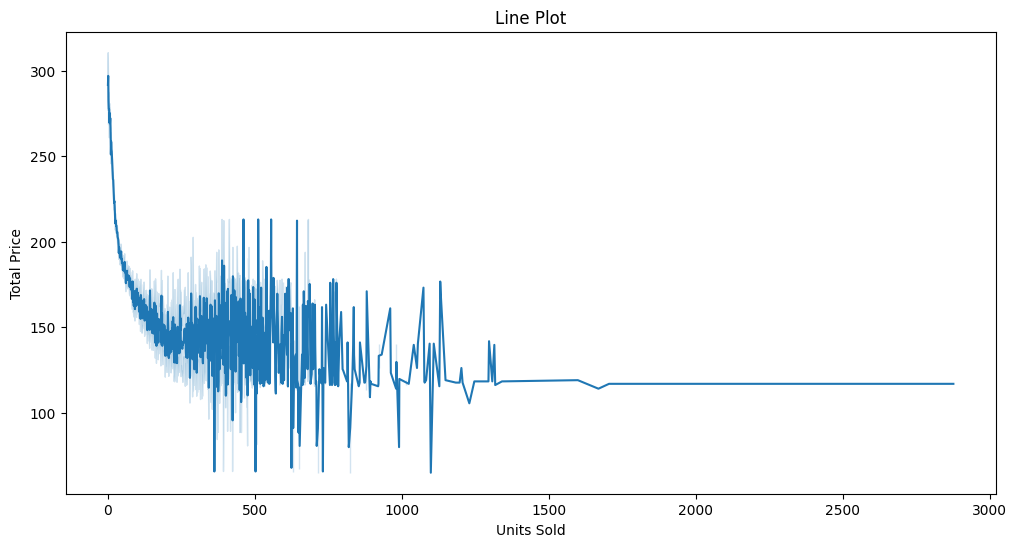

In [158]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Units Sold', y='Total Price', data=data)
plt.title('Line Plot')
plt.xlabel('Units Sold')
plt.ylabel('Total Price')
plt.show()

#### Finding the correlation between the features of the dataset

In [159]:
print(data.corr())

                   ID  Store ID  Total Price  Base Price  Units Sold
ID           1.000000  0.007461     0.008473    0.018911   -0.010608
Store ID     0.007461  1.000000    -0.038315   -0.038855   -0.004369
Total Price  0.008473 -0.038315     1.000000    0.958885   -0.235625
Base Price   0.018911 -0.038855     0.958885    1.000000   -0.140022
Units Sold  -0.010608 -0.004369    -0.235625   -0.140022    1.000000


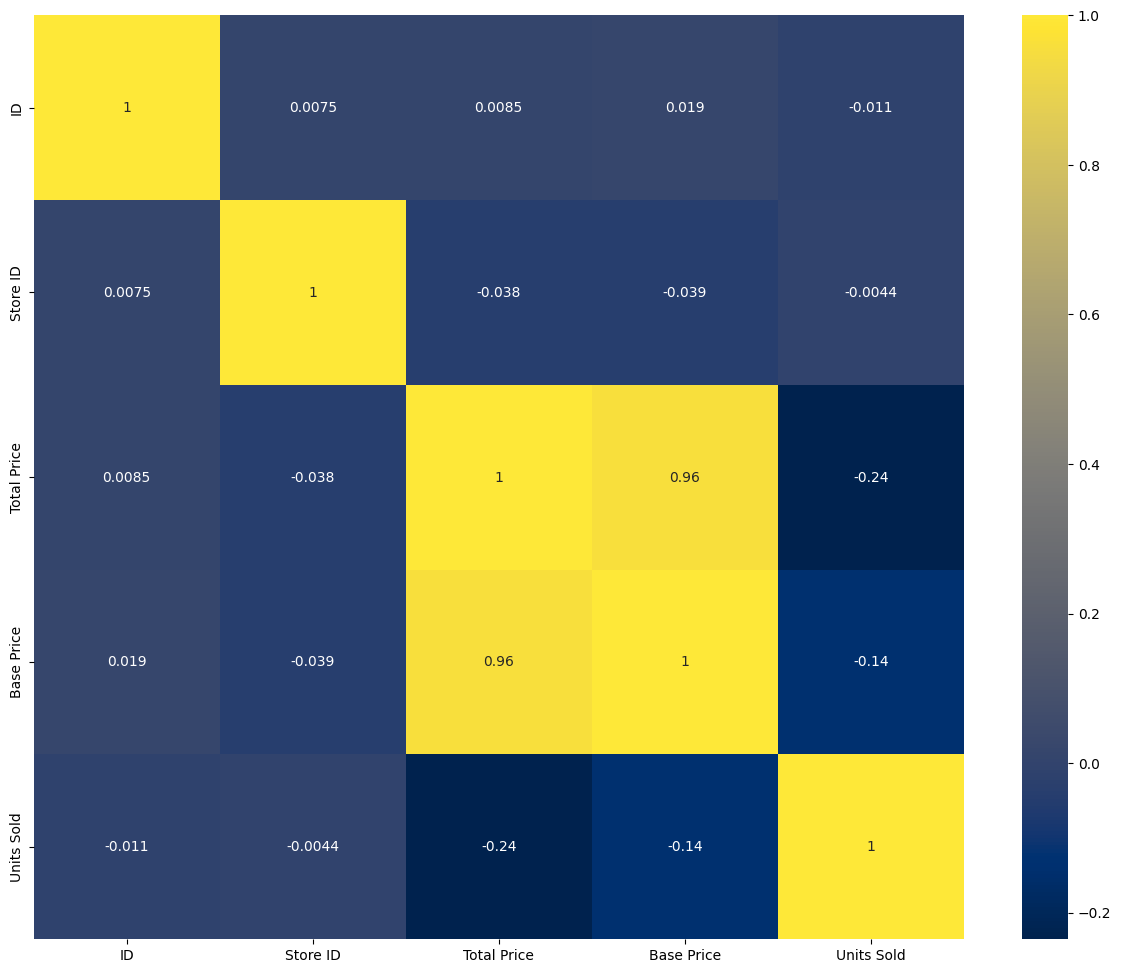

In [156]:
correlations = data.corr(method='pearson')
plt.figure(figsize=(15, 12))
sns.heatmap(correlations, cmap="cividis", annot=True)
plt.show()

#### Feature Engineering 

In [171]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df' with columns: 'ID', 'Store ID', 'Total Price', 'Base Price', 'Units Sold'

# Store-level Features
store_total_sales = df.groupby('Store ID')['Total Price'].sum()
store_avg_price = df.groupby('Store ID')['Base Price'].mean()
store_avg_units_sold = df.groupby('Store ID')['Units Sold'].mean()

df['store_total_sales'] = df['Store ID'].map(store_total_sales)
df['store_avg_price'] = df['Store ID'].map(store_avg_price)
df['store_avg_units_sold'] = df['Store ID'].map(store_avg_units_sold)

# Product-level Features
product_total_sales = df.groupby('ID')['Total Price'].sum()
product_avg_price = df.groupby('ID')['Base Price'].mean()
product_avg_units_sold = df.groupby('ID')['Units Sold'].mean()

df['product_total_sales'] = df['ID'].map(product_total_sales)
df['product_avg_price'] = df['ID'].map(product_avg_price)
df['product_avg_units_sold'] = df['ID'].map(product_avg_units_sold)
print(df.head())

   ID  Store ID  Total Price  Base Price  Units Sold  store_total_sales  \
0   1      8091      99.0375    111.8625          20         201559.125   
1   2      8091      99.0375     99.0375          28         201559.125   
2   3      8091     133.9500    133.9500          19         201559.125   
3   4      8091     133.9500    133.9500          44         201559.125   
4   5      8091     141.0750    141.0750          52         201559.125   

   store_avg_price  store_avg_units_sold  product_total_sales  \
0       181.312372             32.805983              99.0375   
1       181.312372             32.805983              99.0375   
2       181.312372             32.805983             133.9500   
3       181.312372             32.805983             133.9500   
4       181.312372             32.805983             141.0750   

   product_avg_price  product_avg_units_sold  
0           111.8625                    20.0  
1            99.0375                    28.0  
2           133.9

#### Model Selection

In [143]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [135]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [145]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [164]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Model Training and Evaluation

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression - Mean Squared Error: {mse}")
print(f"Decision Tree Regression - R-squared (R2): {r2}")


Decision Tree Regression - Mean Squared Error: 2040.4730483183598
Decision Tree Regression - R-squared (R2): 0.3764693086638464


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared (R2): {r2}")


Linear Regression - Mean Squared Error: 2785.366089660495
Linear Regression - R-squared (R2): 0.1488438208279077


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x = data[["Total Price", "Base Price"]]
y = data["Units Sold"]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Random Forest Regressor - R-squared (R2): {r2}")

Mean Squared Error: 1846.3325249471989
Random Forest Regressor - R-squared (R2): 0.1488438208279077


In [163]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create and train an XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Regression - Mean Squared Error: {mse}")
print(f"XGBoost Regression - R-squared (R2): {r2}")

XGBoost Regression - Mean Squared Error: 1824.5771858716757
XGBoost Regression - R-squared (R2): 0.44244307708923203
